In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

<h3> Lab 1: Dynamics of series RLC circuit

The equations can be written as:
$$V_{in} = L\frac{di_L}{dt} + i_LR + V_c$$
The state variable are the inductor current $i_L$ and capacitor Voltage $V_c$. 
Representing in state space model
$$\dot{i_L} = -\frac{R}{L}i_L - \frac{1}{L}V_c + \frac{V_{in}}{L} $$
$$\dot{V_c} = \frac{1}{C}i_L $$
$$\begin{bmatrix} \dot{i_L} \\ \dot{V_c} \end{bmatrix} = \begin{bmatrix} -\frac{R}{L} & -\frac{1}{L}V_c \\ \frac{1}{C} & 0  \end{bmatrix} \begin{bmatrix} i_L \\ V_c \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \end{bmatrix} V_{in} $$

In [13]:
R = 10
L = 0.002
C= 10**(-6)
V_in = 10

In [14]:
def RLC_circuit(x,t):
    I_L,V_c = x
    I_L_dot = -(R/L)*I_L - V_c/L + V_in/L
    V_c_dot = (1/C)*I_L
    return np.array([I_L_dot, V_c_dot])

In [15]:
time = np.linspace(0,0.2,20000)
I_L0 = 0.0
V_c0 = 0.0
x0 = [I_L0, V_c0]


In [16]:
solution = odeint(RLC_circuit,x0,time)
solution = np.transpose(solution)
I_L, V_C = solution

(0.0, 0.0053)

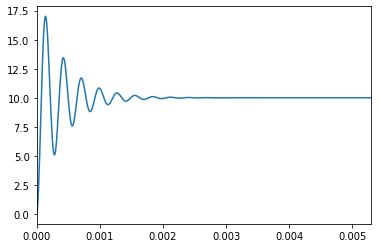

In [17]:
plt.plot(time,V_C)
plt.xlim([0,0.0053])

<h3> Analysis of spring mass damper system.</h3> 
The state variable will be position and velocity

In [18]:
def Mass_Damper(x,t):
    x1,x2 = x 
    x1_dot = x2
    x2_dot = -(k/m)*x1 - (b/m)*x2  + F/m
    return np.array([x1_dot,x2_dot])

In [22]:
m = 1
b = 0.5
k = 5
F = 1
time = np.linspace(0,20,1000)
x0 = np.array([0.0,0.0])

In [23]:
solution = odeint(Mass_Damper,x0,time)
solution = np.transpose(solution)

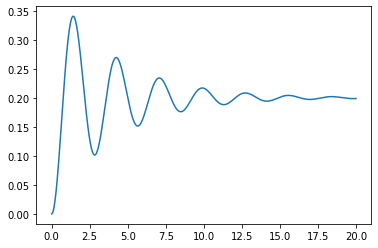

In [24]:
x1,x2 = solution
plt.plot(time,x1)

<h3> Analysis of spring mass damper system with parameter variation

In [25]:
def mass_damper(x, t, m, b,k):
    x1, x2= x
    x1_dot = x2
    x2_dot = -(b/m)*x2 - (k/m)*x1 + 1/m
    return np.array([x1_dot,x2_dot])

In [26]:
#parameters
m = 1
b = .5
k = 5
x0 = [0.0, 0.0]
t = np.linspace(0, 30, 1000)

In [27]:
sol = odeint(mass_damper, x0, t, args=(m, b,k))
sol = np.transpose(sol)
x1,x2 = sol

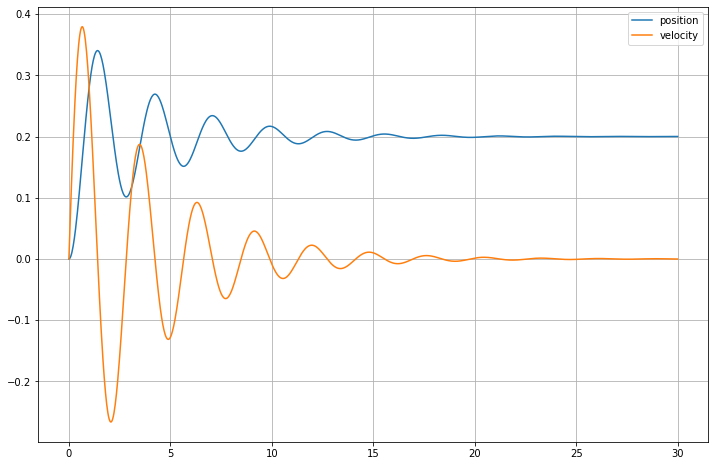

In [28]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(t,x1,label = "position")
ax.plot(t,x2, label = "velocity")
ax.grid()
ax.legend()

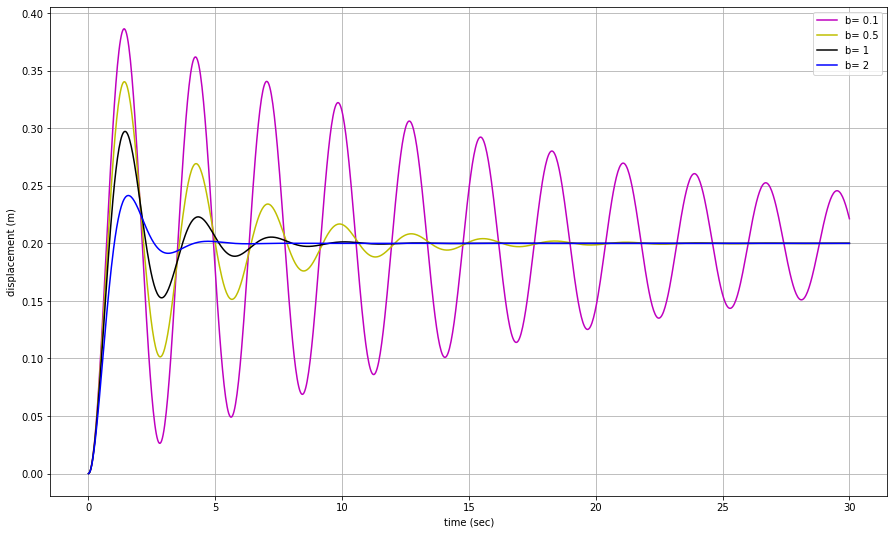

In [17]:
#variation in damping coefficent
damping_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,b in enumerate(damping_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    sol=np.transpose(sol)
    ax.plot(t, sol[0], color_list[i], label='b= '+str(b))

ax.set_xlabel("time (sec)")
ax.set_ylabel("displacement (m)")
ax.legend()
ax.grid()

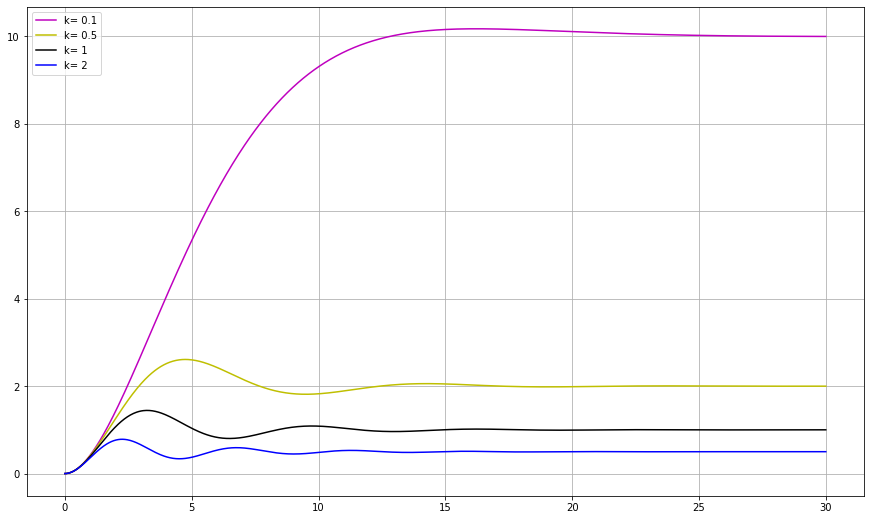

In [18]:
#variation in spring constant
m = 1
b = 0.5
spring_constant_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,k in enumerate(spring_constant_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    ax.plot(t, sol[:, 0], color_list[i], label='k= '+str(k))
    
ax.legend()
ax.grid()

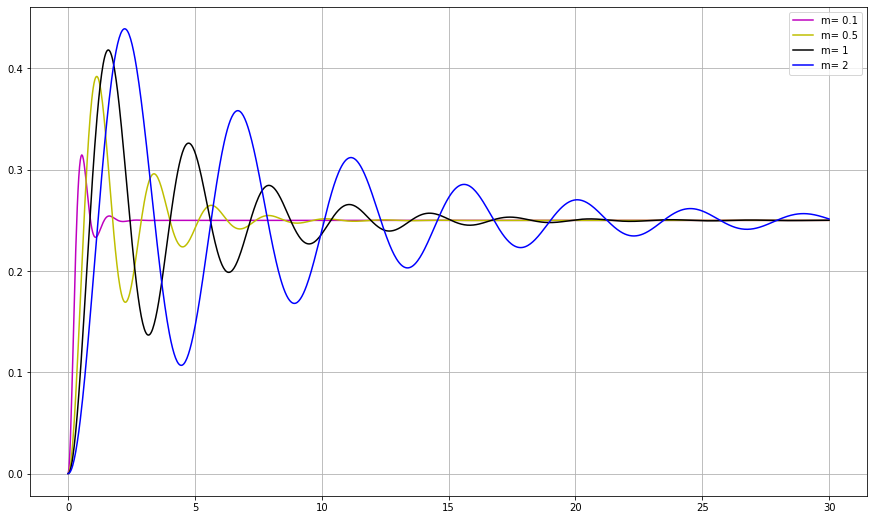

In [19]:
#variation in mass
b = 0.5
k = 4
mass_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,m in enumerate(mass_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    ax.plot(t, sol[:, 0], color_list[i], label='m= '+str(m))
    
ax.legend()
ax.grid()

<h3> Coupled mass 

In [20]:
def mass_damper(y, t):
    y1, y2, y3, y4= y
    y1_dot = y2
    y2_dot = -(k1/m1)*y1 + (k1/m2)*y3 - (b1/m1)*y2 + (b1/m1)*y4 + F/m1
    y3_dot = y4
    y4_dot = -(k1/m2)*y3 + (k1/m2)*y1-(b1/m2)*y4 + (b1/m2)*y2 - (k2/m2)*y3 - (b2/m2)*y4
    return np.array([y1_dot,y2_dot, y3_dot, y4_dot])

In [21]:
F = 0.1
k1,k2,b1,b2, m1,m2 = [8,40, 0.8,0.5,1,1.5]
k_new = 5
y0 = [0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 10, 10000)

In [22]:
sol = odeint(mass_damper, y0, t)
soln = np.transpose(sol)
y1,y2,y3,y4 = soln

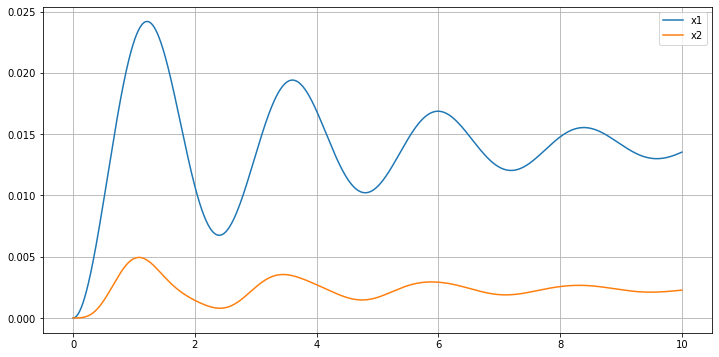

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(t,y1,label = "x1")
ax.plot(t,y3, label = 'x2')
ax.legend()
ax.grid()

<h3> Transfer function approach of system analysis

In [29]:
from control.matlab import lsim
import control

In [32]:
#define the s variable
s = control.tf("s")

In [38]:
#lets analyse spring mass damper system with transfer function approach
m = 2
b = 0.5
k= 50
TF = 1/(m*s**2 + b*s + k)
TF

TransferFunction(array([1]), array([ 2. ,  0.5, 50. ]))

In [39]:
t = np.linspace(0,10,10000)
x0 = np.array([0.0,0.0])
R_t = np.ones((len(t),1)) #step response
output = lsim(TF,U = R_t, T = t, X0 = x0)

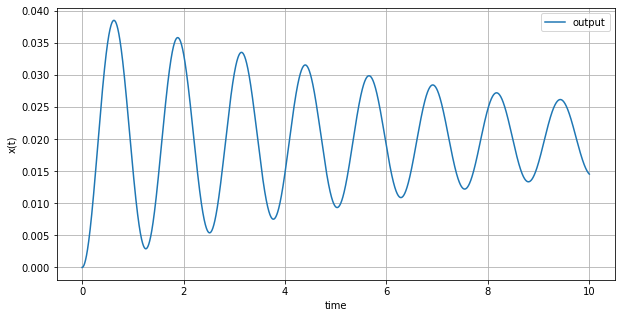

In [40]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(t,output[0], label = "output") #plotting output
#ax.plot(t,R_t, label = "input") #plotting input
ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.grid()
ax.legend()

<h3> stability analysis

In [42]:
s = control.tf('s')
TF = 1/(s**6 + 3*s**5+4*s**4 + 3*s**3 + 2*s**2 + 3*s + 8)
TF

TransferFunction(array([1]), array([1, 3, 4, 3, 2, 3, 8]))

(array([-1.61627062+0.65972845j, -1.61627062-0.65972845j,
        -0.59793183+1.37234831j, -0.59793183-1.37234831j,
         0.71420245+0.81323848j,  0.71420245-0.81323848j]),
 array([], dtype=float64))

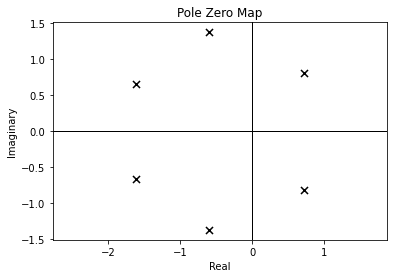

In [43]:
#find the system poles using the following command and plot in s-plane
control.pzmap(TF)

In [44]:
t = np.linspace(0,10,10000)
x0 = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
R_t = np.ones((len(t),1)) #step response
output = lsim(TF,U = R_t, T = t, X0 = x0)

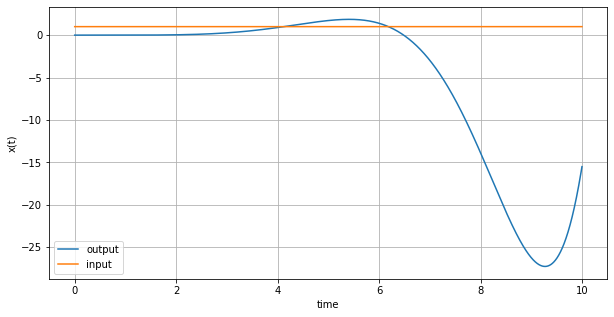

In [45]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(t,output[0], label = "output")
ax.plot(t,R_t, label = "input")
ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.grid()
ax.legend()
